In [1]:
import colour_scheme as cs

import importlib
importlib.reload(cs)
import scanpy as sc
sc.settings.set_figure_params(dpi=100, fontsize=10, dpi_save=250, format='pdf')
import numpy as np
import pandas as pd
from scipy import io
from matplotlib.pyplot import rc_context
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

%matplotlib inline

import matplotlib as mpl
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib import cm
viridis = cm.get_cmap('YlGnBu', 256)
newcolors = viridis(np.linspace(0, 1, 256))
pink = np.array([211/256, 211/256, 211/256, 1])
newcolors[:25, :] = pink
newcmp = ListedColormap(newcolors)



path_fig = ''
sc.settings.set_figure_params(dpi=100, fontsize=10, dpi_save=350, format='.png')
sc.settings.figdir = path_fig
path_data = ''
from pathlib import Path

In [2]:
adata = sc.read_h5ad(Path(path_data)/ 'OSMGT.h5ad')

In [4]:
metadata = pd.read_csv(Path(path_data)/"meta_OSMGT.tsv", sep='\t')
adata.obs = metadata.copy()
adata.obs.merged_cluster_annotation.unique().tolist()

['Non-Neural Ectoderm',
 'Neuroectoderm',
 'Retinal Progenitors',
 'PNS Neurons',
 'Telencephalic Progenitors',
 'Neuroepithelium',
 'Diencephalic Progenitors',
 'CNS Neurons',
 'Neural Crest',
 'Hypothalamic Progenitors',
 'Hindbrain Progenitors',
 'Posterior Floor Plate',
 'Pluripotent Stem Cells',
 'Extraembryonic Tissue',
 'Spinal Cord Progenitors',
 'Mesenchymal Cells',
 'Endoderm-derived Tissue',
 'PNS Progenitors']

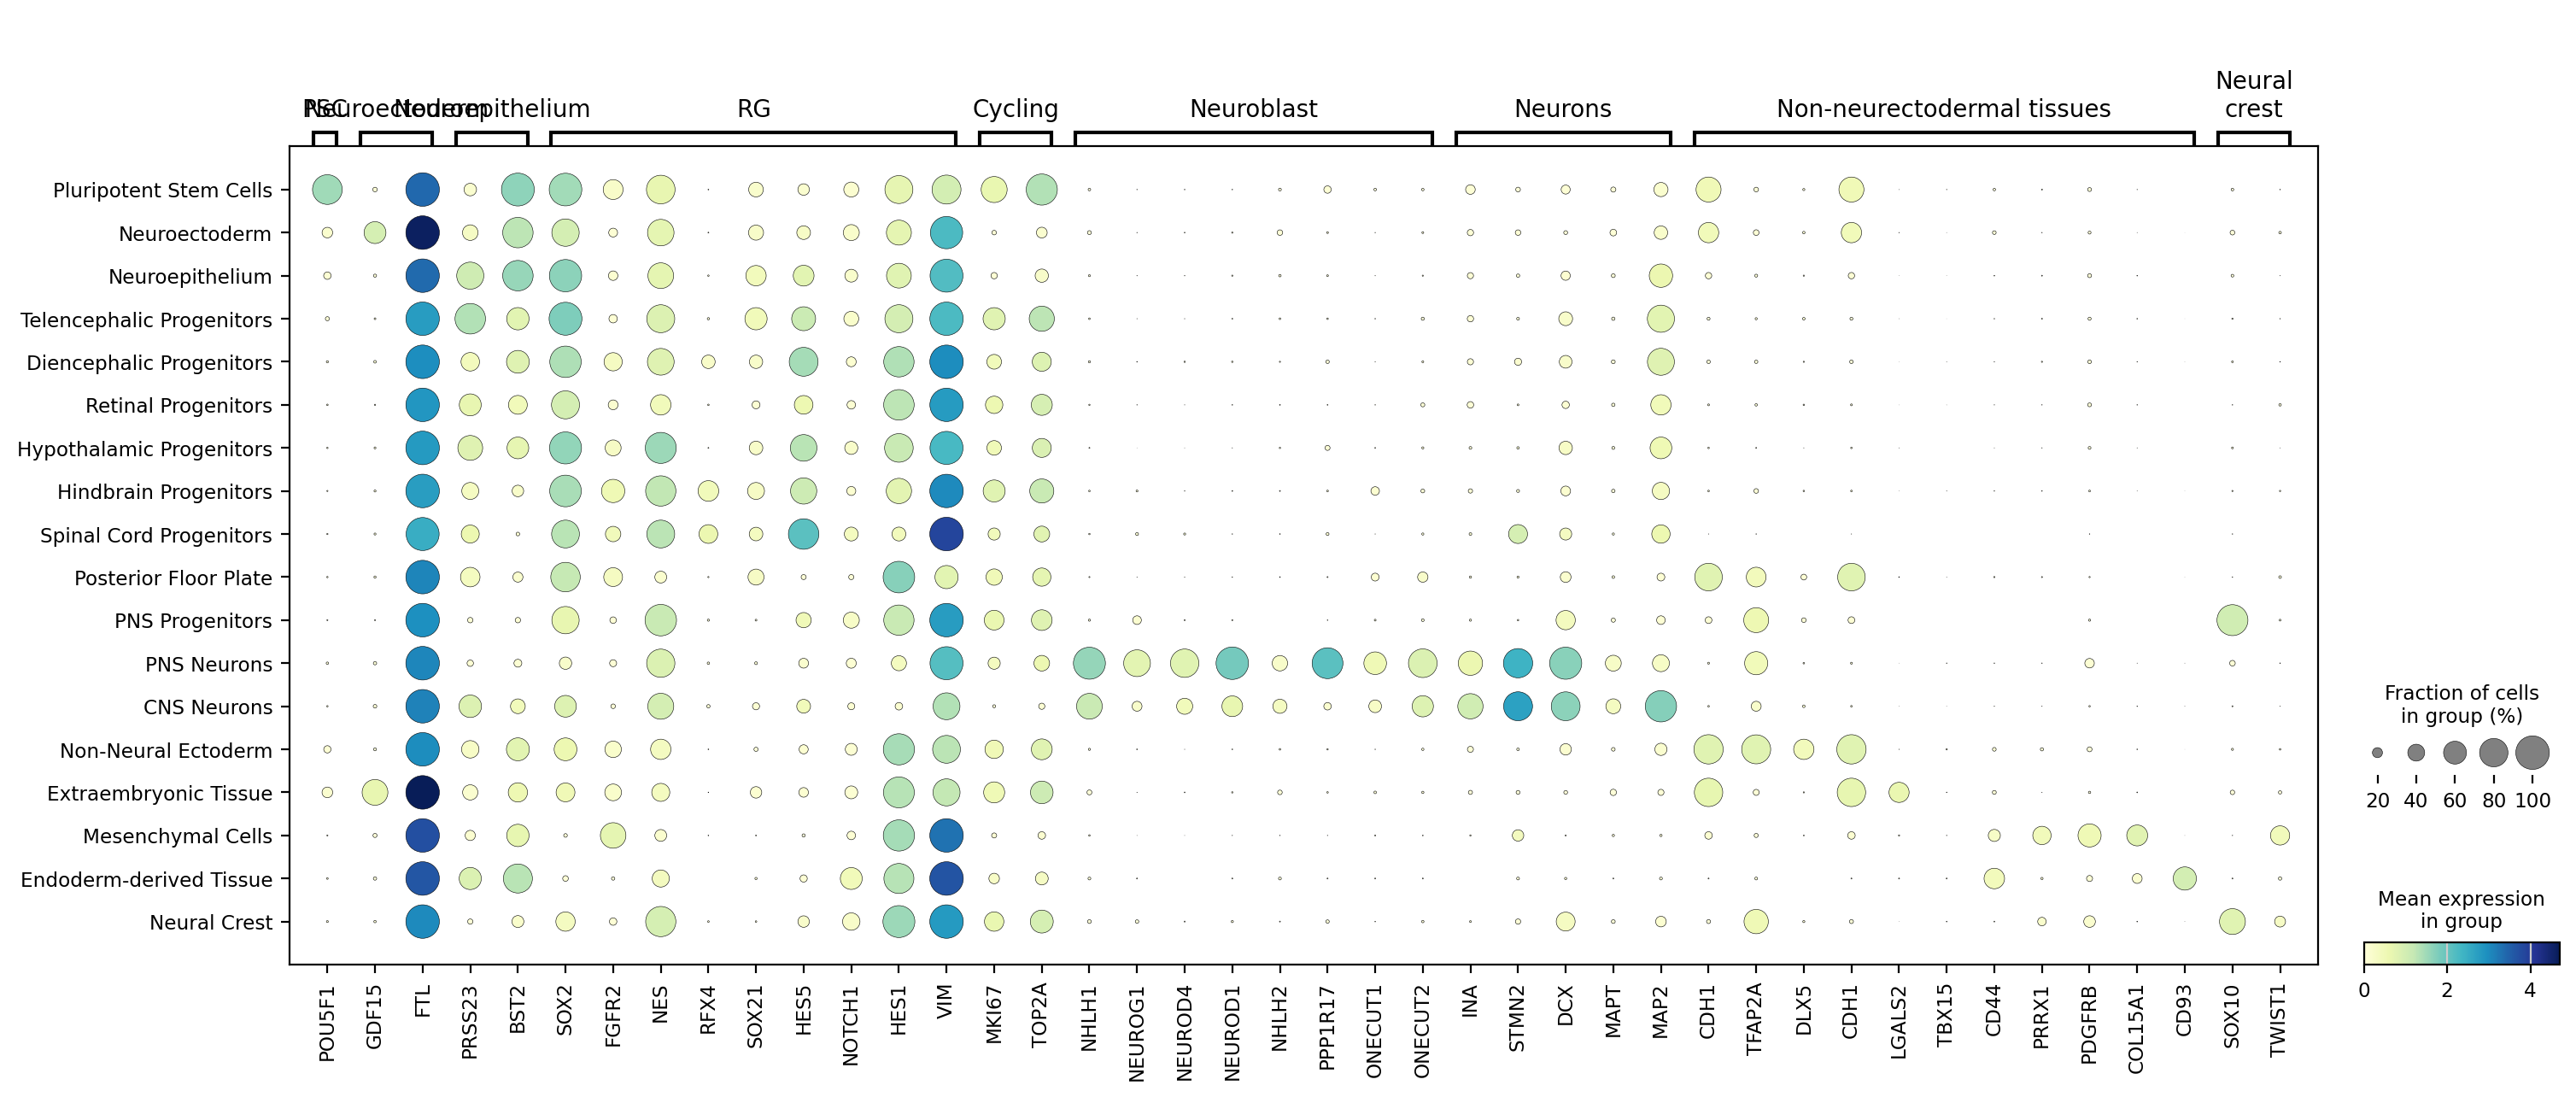

In [48]:
### ED Fig.2 ###
cell_class_order = [ 'Pluripotent Stem Cells','Neuroectoderm',  'Neuroepithelium', 
                    'Telencephalic Progenitors',  'Diencephalic Progenitors','Retinal Progenitors',
                        'Hypothalamic Progenitors', 'Hindbrain Progenitors', 'Spinal Cord Progenitors',
                     'Posterior Floor Plate', 'PNS Progenitors',  'PNS Neurons',
                    'CNS Neurons',
                    'Non-Neural Ectoderm', 'Extraembryonic Tissue',
                     'Mesenchymal Cells',
                     'Endoderm-derived Tissue',
                    'Neural Crest']
adata.obs['merged_cluster_annotation'] = adata.obs['merged_cluster_annotation'].cat.reorder_categories(cell_class_order, ordered=True)


cell_class ={'PSC':['POU5F1'],
    'Neuroectoderm': ['GDF15', 'FTL'],
    'Neuroepithelium':['PRSS23', 'BST2'],
             'RG': ['SOX2', 'FGFR2', 'NES', 'RFX4',
          'SOX21', 'HES5', 'NOTCH1', 'HES1', 'VIM'], 
             'Cycling': ['MKI67', 'TOP2A'],
    'Neuroblast': ['NHLH1', 'NEUROG1', 'NEUROD4', 'NEUROD1', 'NHLH2', 'PPP1R17', 'ONECUT1', 'ONECUT2'],
             'Neurons': ['INA', 'STMN2', 'DCX', 'MAPT', 'MAP2'],
   
             "Non-neurectodermal tissues": ["CDH1","TFAP2A", "DLX5", "CDH1","LGALS2","CD44", "PRRX1", "PDGFRB","COL15A1", 'CD93'],
               'Neural\ncrest': [ 'SOX10', 'TWIST1'],
           
            }
plt.rcParams['pdf.fonttype'] = 42 
sc.pl.dotplot(adata,cell_class, 'merged_cluster_annotation', dendrogram=False,var_group_rotation=0,
              cmap='YlGnBu', use_raw=False,  save='osmgt_dotplot_cell_class.pdf') #everything is stored in X 


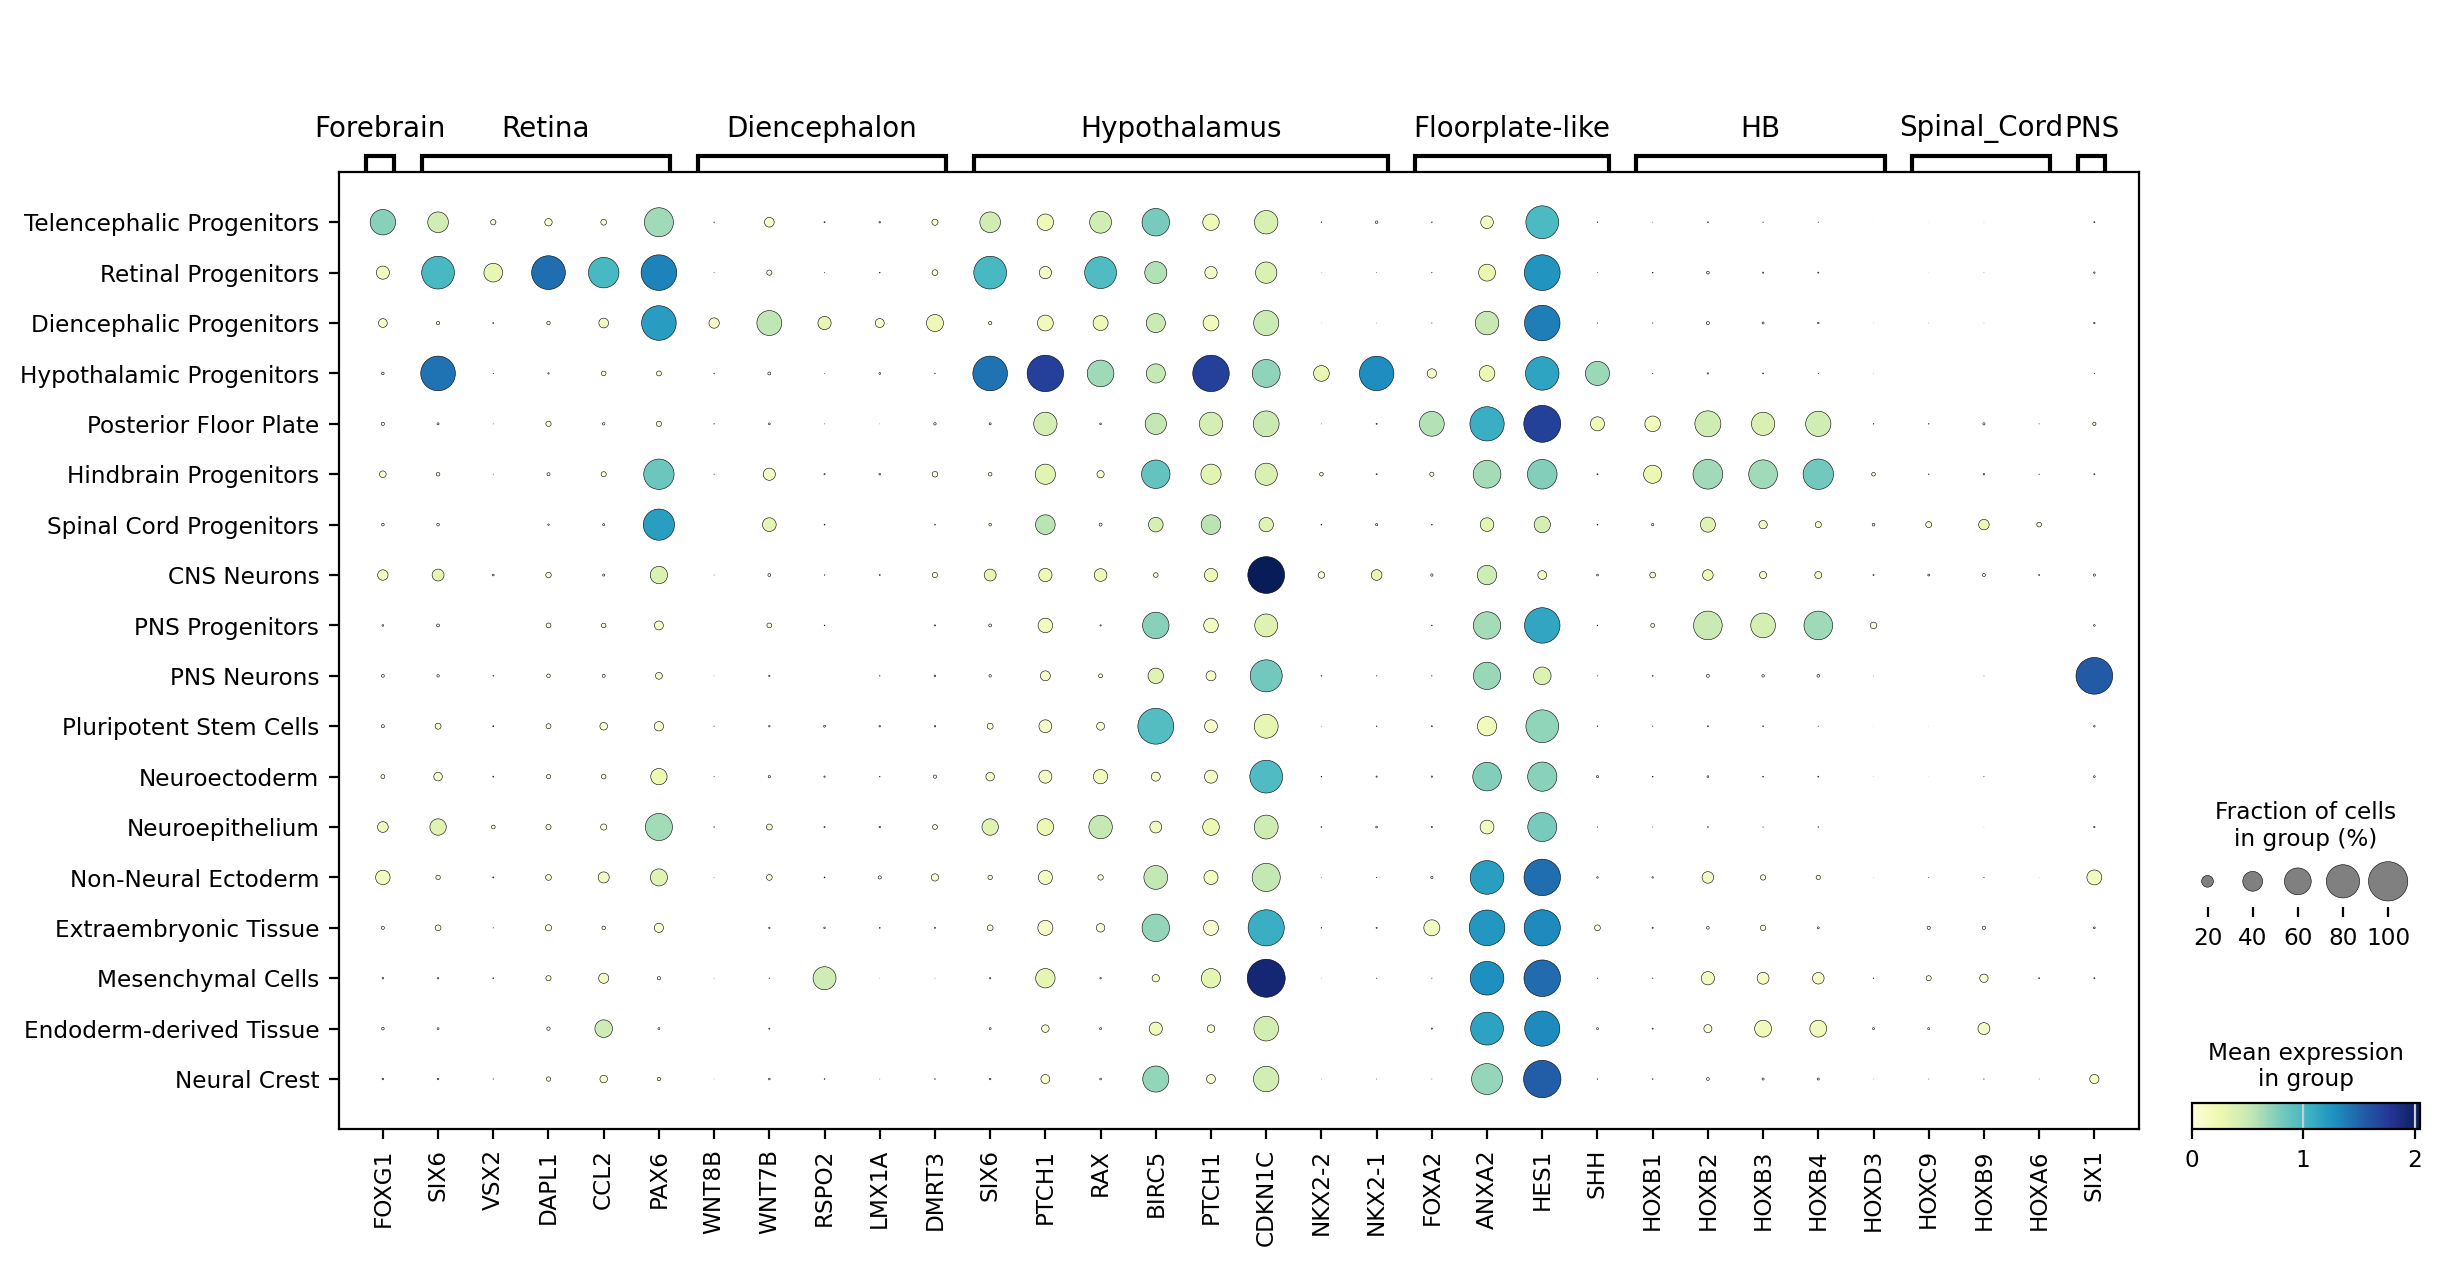

In [9]:
region_order = [ 'Telencephalic Progenitors',
                'Retinal Progenitors',
                 'Diencephalic Progenitors',
                'Hypothalamic Progenitors', 'Posterior Floor Plate',
                'Hindbrain Progenitors', 'Spinal Cord Progenitors',
                  'CNS Neurons',
                'PNS Progenitors',  'PNS Neurons',
                'Pluripotent Stem Cells','Neuroectoderm',  'Neuroepithelium', 
                 'Non-Neural Ectoderm', 'Extraembryonic Tissue',
                             'Mesenchymal Cells',
                             'Endoderm-derived Tissue',
                            'Neural Crest']
          


adata.obs['merged_cluster_annotation'] = adata.obs['merged_cluster_annotation'].astype("category").cat.reorder_categories(region_order, ordered=True)

region = {
    'Forebrain': 'FOXG1',
    "Retina": ["SIX6", "VSX2",'DAPL1', 'CCL2', 'PAX6',]
    "Diencephalon": ["WNT8B","WNT7B", "RSPO2", "LMX1A","DMRT3"],
    "Hypothalamus": ['SIX6', "PTCH1","RAX",'BIRC5',  'PTCH1',
                            'CDKN1C',  
                               'NKX2-2','NKX2-1'],
    'Floorplate-like':['FOXA2', 'ANXA2',  'HES1','SHH'],
    "HB": ['HOXB1', 'HOXB2',"HOXB3", 'HOXB4', 'HOXD3'],
    "Spinal_Cord": ["HOXC9", "HOXB9",'HOXA6'],
    "PNS": ["SIX1"],
}

plt.rcParams['pdf.fonttype'] = 42 
sc.pl.dotplot(adata,region, 'merged_cluster_annotation', dendrogram=False,var_group_rotation=0,
              cmap='YlGnBu', use_raw=False, save='osmgt_dotplot_region.pdf') 

# Neurons

In [15]:
neuron = sc.read_h5ad(Path(path_data)/"OSMGT_neuron.h5ad")
neuron

AnnData object with n_obs × n_vars = 3121 × 33421
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_HTO', 'nFeature_HTO', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'HTO_classification.global', 'hash.ID', 'Condition', 'Morphogen', 'Morphogen_AP', 'Dose_AP', 'Timing', 'Morphogen_DV', 'Dose_DV', 'Timing_DV', 'Morphogen_F', 'Dose_F', 'Timing_F', 'Cell_Line', 'Timing_AP', 'BEST', 'percent.mt', 'S.Score', 'G2M.Score', 'Phase', 'old.ident', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.1', 'seurat_clusters', 'nCount_exon', 'nFeature_exon', 'nCount_intron', 'nFeature_intron', 'maxsim_linnarsson', 'maxsim_mmgastrul', 'maxsim_fleck', 'css_normdist_fleck', 'css_faillh_fleck', 'maxsim_region', 'cssproj_region', 'seurat_cluster_annotation', 'merged_cluster_annotation', 'Germ_Layer', 'Experiment', 'Condition_raw', 'Cell_Line_raw', 'Condition_ident', 'Condition_ident_line', 'CNeu_pred_Region_VF', 'CNeu_pred_Subregion_VF', 'CNeu_pred_Clusters_VF', 'CNeu_pred_Tissue_VF', 

In [16]:
meta = pd.read_csv(Path(path_data)/"meta_OSMGT_neurons.tsv", sep='\t')

neuron.obs = meta.copy()
neuron.obs.merged_cluster_annotation.unique()

array(['Unspecified Neurons', 'Diencephalic Neurons',
       'Mixed Telencephalic Neurons', 'Retinal Neurons',
       'Subpallial Interneurons', 'Hindbrain / Spinal Cord Neurons',
       'Hypothalamic Neurons'], dtype=object)

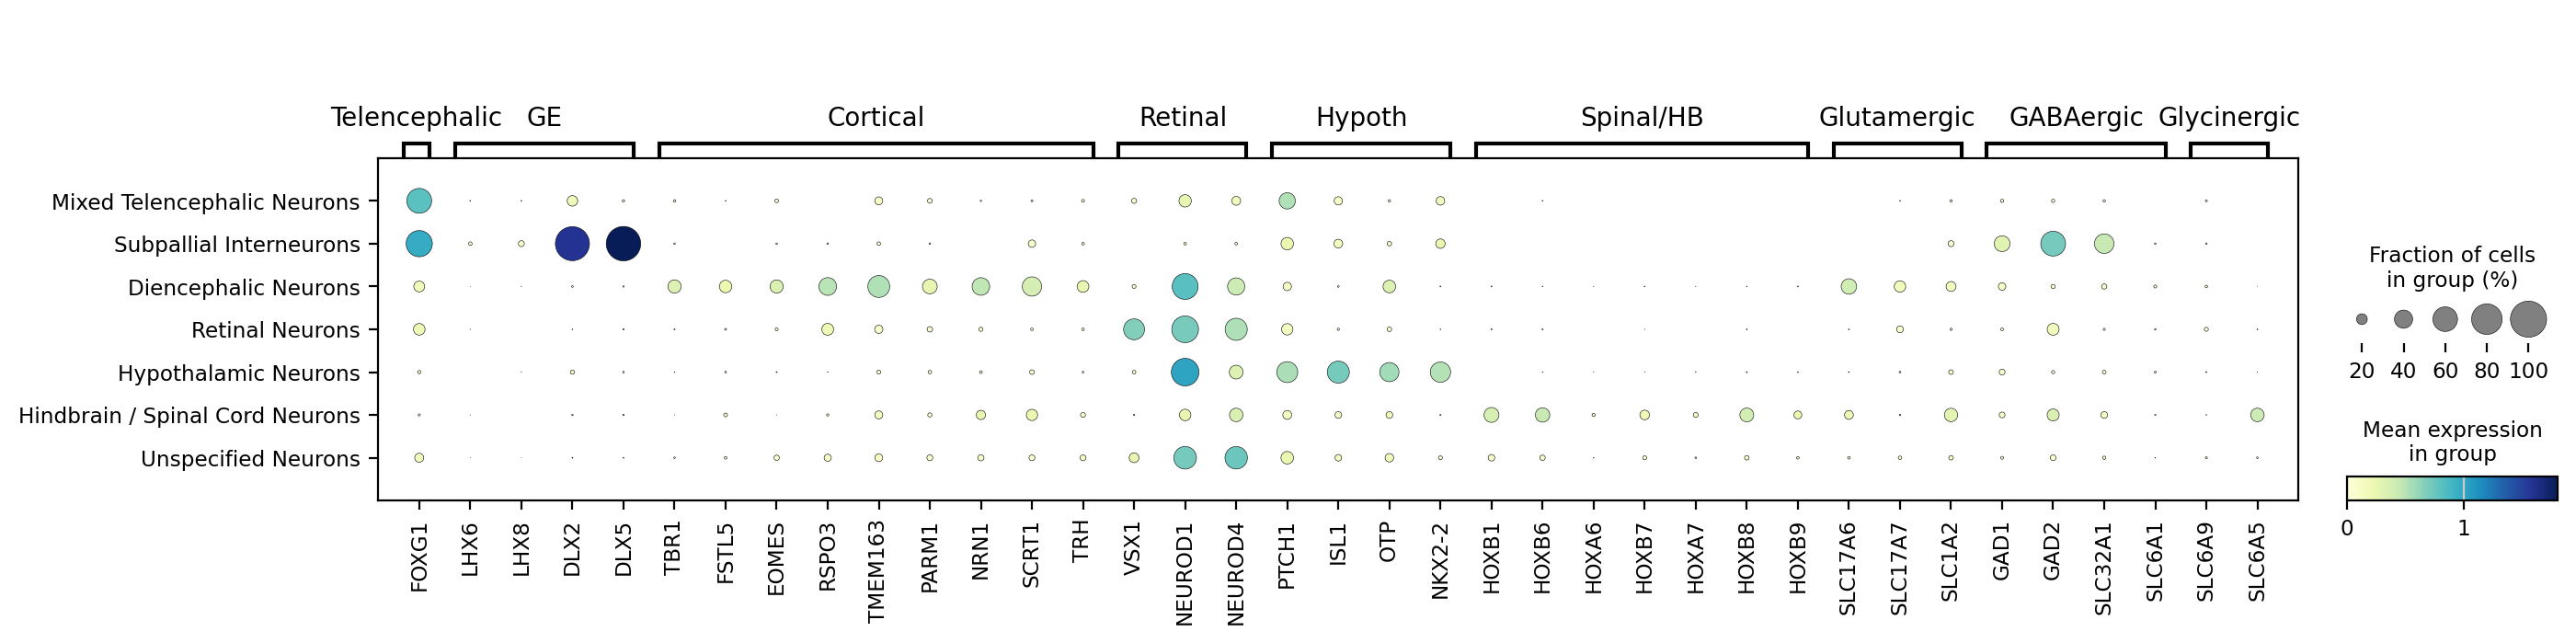

In [19]:
border_neuron = ['Mixed Telencephalic Neurons',
                 'Subpallial Interneurons',
                'Diencephalic Neurons',
                 'Retinal Neurons',
                 'Hypothalamic Neurons',
                 'Hindbrain / Spinal Cord Neurons',
                
                'Unspecified Neurons' ]

gene_categories = {
    'Telencephalic' : ['FOXG1'],
    "GE": ["LHX6", "LHX8", "DLX2", "DLX5"],
    'Cortical':[ "TBR1", "FSTL5", "EOMES",  "RSPO3",
               "TMEM163", "PARM1", "NRN1", "SCRT1", "TRH"],
    "Retinal": ["VSX1", "NEUROD1", "NEUROD4"],
     "Hypoth": ["PTCH1", "ISL1", "OTP", "NKX2-2"],
    "Spinal/HB": ["HOXB1", "HOXB6", "HOXA6", "HOXB7", "HOXA7", "HOXB8", "HOXB9"],
    
   
   
    "Glutamergic": ["SLC17A6", "SLC17A7", "SLC1A2"],
    "GABAergic": ["GAD1", "GAD2", "SLC32A1", "SLC6A1"],
    "Glycinergic": ["SLC6A9", "SLC6A5"]    }


neuron.obs['merged_cluster_annotation'] = neuron.obs['merged_cluster_annotation'].astype("category").cat.reorder_categories(order_neuron, ordered=True)

plt.rcParams['pdf.fonttype'] = 42 
sc.pl.dotplot(neuron, gene_categories, 'merged_cluster_annotation', dendrogram=False,var_group_rotation=0,
              cmap='YlGnBu', use_raw=False, save='osmgt_neuros.pdf') 